In [9]:
# 5DATA002W.2 Machine Learning & Data Mining
# Coursework - Python Notebook 3: Ensemble Models and Regression Decision Trees
# Author: Senuri Hansamini Wedamulla

In [10]:
# This code was reused from Code Reuse Session 3: Part 1, Item 1
# import pandas
import pandas as pd

In [11]:
# This code was reused from Code Reuse Session 3: Part 1, Item 2
# load prepared dataset file
data = pd.read_csv('/content/drive/MyDrive/IIT/LEVEL 5/ML/CW/ Prepared_Coursework_Dataset_Notebook1.csv')

In [12]:
# This code was reused from Code Reuse Session 3: Part 1, Item 3
# reading the data
data.head(15)

Age  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0    68        1        1          1               1      3        1   
1    50        2        2          3               0      2        1   
2    58        3        3          5               0      2        1   
3    58        1        1          1               1      3        1   
4    47        2        1          2               1      3        1   
5    51        1        1          1               0      2        1   
6    51        1        1          1               3      1        1   
7    40        2        1          2               0      2        1   
8    40        4        3          5               1      3        1   
9    69        4        3          5               3      1        0   
10   68        1        1          1               0      2        1   
11   46        3        1          3               1      3        1   
12   65        2        1          2               1      3        1   
13   48        1        2          3               1      3        1   
14   62        2        3          5               0      2        1   

    Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0            4                1                    1                      24   
1           35                1                    1                      14   
2           63                1                    1                      14   
3           18                1                    1                       2   
4           41                1                    1                       3   
5           20                1                    1                      18   
6            8                1                    1                      11   
7           30                1                    1                       9   
8          103                1                    1                      20   
9           32                1                    1                      21   
10          13                1                    1                       9   
11          59                0                    0                      11   
12          35                1                    1                      13   
13          15                1                    1                      23   
14          35                1                    1                      16   

    Reginol_Node_Positive  Survival_Months  Mortality_Status  
0                       1               60                 1  
1                       5               62                 1  
2                       7               75                 1  
3                       1               84                 1  
4                       1               50                 1  
5                       2               89                 1  
6                       1               54                 1  
7                       1               14                 0  
8                      18               70                 1  
9                      12               92                 1  
10                      1               64                 0  
11                      3               92                 1  
12                      3               56                 1  
13                      7               38                 1  
14                     14               64                 1

In [13]:
# This code was reused from Code Reuse Session 3: Part 1, Item 4
# checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4015 non-null   int64
 1   T_Stage                 4015 non-null   int64
 2   N_Stage                 4015 non-null   int64
 3   6th_Stage               4015 non-null   int64
 4   Differentiated          4015 non-null   int64
 5   Grade                   4015 non-null   int64
 6   A_Stage                 4015 non-null   int64
 7   Tumor_Size              4015 non-null   int64
 8   Estrogen_Status         4015 non-null   int64
 9   Progesterone_Status     4015 non-null   int64
 10  Regional_Node_Examined  4015 non-null   int64
 11  Reginol_Node_Positive   4015 non-null   int64
 12  Survival_Months         4015 non-null   int64
 13  Mortality_Status        4015 non-null   int64
dtypes: int64(14)
memory usage: 439.3 KB


In [14]:
# This code was reused from Code Reuse Session 1, Item 8
#describing variables
data.describe()

Age      T_Stage      N_Stage    6th_Stage  Differentiated  \
count  4015.000000  4015.000000  4015.000000  4015.000000     4015.000000   
mean     53.993524     1.783562     1.437111     2.319303        0.689166   
std       8.971774     0.764971     0.692668     1.265527        1.015338   
min      30.000000     1.000000     1.000000     1.000000        0.000000   
25%      47.000000     1.000000     1.000000     1.000000        0.000000   
50%      54.000000     2.000000     1.000000     2.000000        0.000000   
75%      61.000000     2.000000     2.000000     3.000000        1.000000   
max      89.000000     4.000000     3.000000     5.000000        3.000000   

             Grade      A_Stage   Tumor_Size  Estrogen_Status  \
count  4015.000000  4015.000000  4015.000000      4015.000000   
mean      2.151183     0.977335    30.362889         0.933001   
std       0.637874     0.148852    20.896703         0.250051   
min       1.000000     0.000000     1.000000         0.000000   
25%       2.000000     1.000000    16.000000         1.000000   
50%       2.000000     1.000000    25.000000         1.000000   
75%       3.000000     1.000000    38.000000         1.000000   
max       4.000000     1.000000   140.000000         1.000000   

       Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  \
count          4015.000000             4015.000000            4015.000000   
mean              0.826899               14.364882               4.147198   
std               0.378382                8.128184               5.094083   
min               0.000000                1.000000               1.000000   
25%               1.000000                9.000000               1.000000   
50%               1.000000               14.000000               2.000000   
75%               1.000000               19.000000               5.000000   
max               1.000000               61.000000              46.000000   

       Survival_Months  Mortality_Status  
count      4015.000000       4015.000000  
mean         71.301121          0.846824  
std          22.921993          0.360202  
min           1.000000          0.000000  
25%          56.000000          1.000000  
50%          73.000000          1.000000  
75%          90.000000          1.000000  
max         107.000000          1.000000

In [15]:
# This code was reused from Code Reuse Session 3: Part 1, Item 5
# declaring input variables (input features) and output variable (target feature)
feature_cols = [
    'Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
    'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
    'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive'
]

X = data[feature_cols]
y = data['Mortality_Status']

In [16]:
# This code was reused from Code Reuse Session 3: Part 1, Item 6
# Python library and function to randomly sample training and test subsets.
from sklearn.model_selection import train_test_split

In [17]:
# This code was reused from Code Reuse Session 3: Part 1, Item 7
# samples dataset into training and test subsets with a ratio of choice and ensures the reproducibility of the sampling output.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Copied code from notebook two

# This code was reused from Code Reuse Session 2, Item 9
#machine learning library to initiate the Logistic Regression modelling algorithm.
from sklearn.linear_model import LogisticRegression

# This code was reused from Code Reuse Session 2, Item 10
#declares Logistic Regression modelling algorithm
logreg = LogisticRegression()

# This code was reused from Code Reuse Session 2, Item 11
#estimates logreg algorithm learnable parameters using the desired sampled dataset.
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# Copied code from notebook two

# This code was reused from Code Reuse Session 2, Item 20
# initiate a machine learning library and function to use the KNN modelling algorithm.
from sklearn.neighbors import KNeighborsClassifier

# This code was reused from Code Reuse Session 2, Item 21
#declares K-Nearest Neighbour modelling algorithm
knn = KNeighborsClassifier(n_neighbors = 5)

# This code was reused from Code Reuse Session 2, Item 22
# builds K-Nearest Neighbour model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
# Copied code from notebook two

# This code was reused from Code Reuse Session 2, Item 24
# initiates a suitable library and a nested cross-validation algorithm
from sklearn.model_selection import GridSearchCV

# This code was reused from Code Reuse Session 2, Item 25
# tunes model's hyperparameters and displays the best combination of hyperparameters using desired data subset.
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X_train, y_train)

knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [22]:
# This code was reused from Code Reuse Session 3: Part 1, Item 8
# Python machine-learning library to initiate the Voting Ensemble Classifier method
from sklearn.ensemble import VotingClassifier

In [23]:
# This code was reused from Code Reuse Session 3: Part 1, Item 9
# declare the dictionary of base_learners and leverage them to be used by the Voting Classifier.
base_learners = [
    ('LogReg', logreg),
    ('KNN', knn_gscv),
]

ensemble_learner = VotingClassifier(estimators=base_learners, voting='soft')

In [24]:
# This code was reused from Code Reuse Session 3: Part 1, Item 10
# trains voting ensemble algorithm using desired dataset subset.
ensemble_learner.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('LogReg', LogisticRegression()),
                             ('KNN',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'metric': ['euclidean',
                                                                  'manhattan'],
                                                       'n_neighbors': [3, 5, 7,
                                                                       9, 11],
                                                       'weights': ['uniform',
                                                                   'distance']}))],
                 voting='soft')

In [25]:
# This code was reused from Code Reuse Session 3: Part 1, Item 11
# make the relevant predictions on isolated dataset
y_pred_ensemble_learner = ensemble_learner.predict(X_test)

In [26]:
# This code was reused from Code Reuse Session 3: Part 1, Item 12
# calculates and presents the accuracy score only for ensemble voting classifier.
from sklearn.metrics import accuracy_score

ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)
print ("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)

The voting ensemble classifier accuracy is:  0.8567870485678705


Text(0.5, 1.0, 'Ensemble Learner Confusion Matrix')

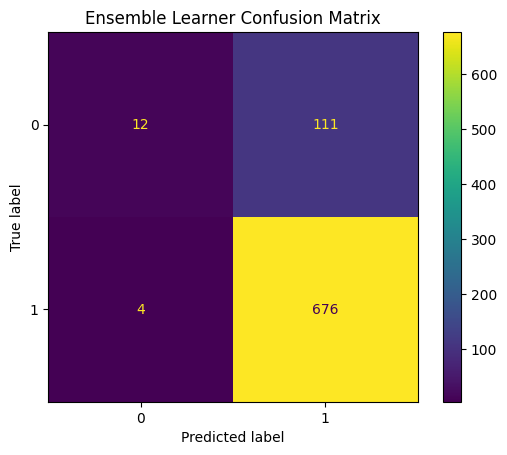

In [27]:
# This code was reused from Code Reuse Session 3: Part 1, Item 13
# create a confusion matrix.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ensemble_learner_cm_test = confusion_matrix(y_test, y_pred_ensemble_learner, labels=ensemble_learner.classes_)
ensemble_learner_disp = ConfusionMatrixDisplay(ensemble_learner_cm_test,display_labels=ensemble_learner.classes_)
ensemble_learner_disp.plot()
ensemble_learner_disp.ax_.set_title("Ensemble Learner Confusion Matrix")

In [28]:
# This code was reused from Code Reuse Session 3: Part 1, Item 14
# create a report then displays it
from sklearn.metrics import classification_report
print("Ensemble Learner Classification Report \n", classification_report(y_test, y_pred_ensemble_learner))

Ensemble Learner Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.10      0.17       123
           1       0.86      0.99      0.92       680

    accuracy                           0.86       803
   macro avg       0.80      0.55      0.55       803
weighted avg       0.84      0.86      0.81       803



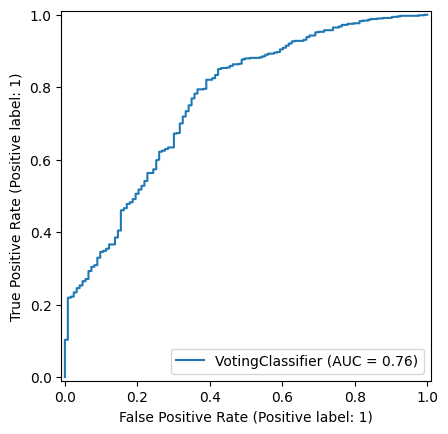

In [29]:
# This code was reused from Code Reuse Session 3: Part 1, Item 15
# Display Operator Characteristic Curve (AUC-ROC)
from sklearn.metrics import RocCurveDisplay

ensemble_learner_ROC = RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)

In [35]:
# Part 2: predict cancer patients survival months with a regression decision tree

In [44]:
# This code was reused from Code Reuse Session 3: Part 2, Item 2
# load prepared dataset file of isolated dead patients
dataset = pd.read_csv('/content/drive/MyDrive/IIT/LEVEL 5/ML/CW/Coursework_Dataset_isolated_dead_patients(regression_modelling).csv')

In [45]:
# This code was reused from Code Reuse Session 3: Part 1, Item 3
# reading the data
dataset.head(15)

Age  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0    40        2        1          2               0      2        1   
1    68        1        1          1               0      2        1   
2    57        3        3          5               0      2        1   
3    42        1        3          5               0      2        1   
4    67        1        1          1               0      2        1   
5    31        3        3          5               1      3        1   
6    64        2        3          5               1      3        1   
7    53        3        1          3               1      3        1   
8    63        2        2          3               3      1        1   
9    45        2        3          5               1      3        1   
10   50        2        1          2               0      2        1   
11   50        4        1          4               1      3        1   
12   38        3        3          5               0      2        1   
13   57        2        1          2               1      3        1   
14   54        2        1          2               1      3        1   

    Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0           30                1                    1                       9   
1           13                1                    1                       9   
2           70                1                    1                      12   
3            9                0                    0                      15   
4           13                1                    1                      16   
5           70                1                    1                      23   
6           34                1                    0                      24   
7           60                1                    1                       8   
8           26                1                    1                       5   
9           25                1                    1                      21   
10          30                1                    0                       4   
11          24                1                    1                       3   
12          70                1                    1                      33   
13          27                1                    1                       7   
14          40                1                    0                      11   

    Reginol_Node_Positive  Survival_Months  
0                       1               14  
1                       1               64  
2                      12               42  
3                       2               39  
4                       3               60  
5                      23               44  
6                      20               12  
7                       1               91  
8                       4               87  
9                      16               40  
10                      2               25  
11                      3               63  
12                     24               54  
13                      1               53  
14                      1               24

In [46]:
# This code was reused from Code Reuse Session 3: Part 2, Item 3
# checking the datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     615 non-null    int64
 1   T_Stage                 615 non-null    int64
 2   N_Stage                 615 non-null    int64
 3   6th_Stage               615 non-null    int64
 4   Differentiated          615 non-null    int64
 5   Grade                   615 non-null    int64
 6   A_Stage                 615 non-null    int64
 7   Tumor_Size              615 non-null    int64
 8   Estrogen_Status         615 non-null    int64
 9   Progesterone_Status     615 non-null    int64
 10  Regional_Node_Examined  615 non-null    int64
 11  Reginol_Node_Positive   615 non-null    int64
 12  Survival_Months         615 non-null    int64
dtypes: int64(13)
memory usage: 62.6 KB


In [51]:
# This code was reused from Code Reuse Session 1, Item 7
# describing data
data.describe()

Age      T_Stage      N_Stage    6th_Stage  Differentiated  \
count  4015.000000  4015.000000  4015.000000  4015.000000     4015.000000   
mean     53.993524     1.783562     1.437111     2.319303        0.689166   
std       8.971774     0.764971     0.692668     1.265527        1.015338   
min      30.000000     1.000000     1.000000     1.000000        0.000000   
25%      47.000000     1.000000     1.000000     1.000000        0.000000   
50%      54.000000     2.000000     1.000000     2.000000        0.000000   
75%      61.000000     2.000000     2.000000     3.000000        1.000000   
max      89.000000     4.000000     3.000000     5.000000        3.000000   

             Grade      A_Stage   Tumor_Size  Estrogen_Status  \
count  4015.000000  4015.000000  4015.000000      4015.000000   
mean      2.151183     0.977335    30.362889         0.933001   
std       0.637874     0.148852    20.896703         0.250051   
min       1.000000     0.000000     1.000000         0.000000   
25%       2.000000     1.000000    16.000000         1.000000   
50%       2.000000     1.000000    25.000000         1.000000   
75%       3.000000     1.000000    38.000000         1.000000   
max       4.000000     1.000000   140.000000         1.000000   

       Progesterone_Status  Regional_Node_Examined  Reginol_Node_Positive  \
count          4015.000000             4015.000000            4015.000000   
mean              0.826899               14.364882               4.147198   
std               0.378382                8.128184               5.094083   
min               0.000000                1.000000               1.000000   
25%               1.000000                9.000000               1.000000   
50%               1.000000               14.000000               2.000000   
75%               1.000000               19.000000               5.000000   
max               1.000000               61.000000              46.000000   

       Survival_Months  Mortality_Status  
count      4015.000000       4015.000000  
mean         71.301121          0.846824  
std          22.921993          0.360202  
min           1.000000          0.000000  
25%          56.000000          1.000000  
50%          73.000000          1.000000  
75%          90.000000          1.000000  
max         107.000000          1.000000

In [49]:
# This code was reused from Code Reuse Session 3: Part 2, Item 6
# initiate the regression decision tree
from sklearn.tree import DecisionTreeRegressor

In [47]:
# This code was reused from Code Reuse Session 3: Part 2, Item 4
# declare input variables (input features) and output variable (target feature)
X = dataset.drop(['Survival_Months'], axis=1)
y = dataset['Survival_Months']

In [52]:
# This code was reused from Code Reuse Session 3: Part 2, Item 5
# samples dataset into training and test subsets with a ratio of choice and ensures the reproducibility of the sampling output.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# This code was reused from Code Reuse Session 3: Part 2, Item 7
# training the DT regression algorithm
DT_regressor = DecisionTreeRegressor()

DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
# This code was reused from Code Reuse Session 3: Part 2, Item 8
# making predictions on isolated data.
y_pred_DT = DT_regressor.predict(X_test)

In [54]:
# This code was reused from Code Reuse Session 3: Part 2, Item 9
# applies the metrics methods to calculate the regression metrics, then presents their values.
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_DT))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_DT))
print('R2:', metrics.r2_score(y_test, y_pred_DT))

MAE: 30.146341463414632
MSE: 1271.6747967479675
R2: -1.3882860674722473


In [55]:
# This code was reused from Code Reuse Session 3: Part 2, Item 10
# import libraries to plot DT regressor
from sklearn import tree
from matplotlib import pyplot as plt

In [57]:
# This code was reused from Code Reuse Session 3: Part 2, Item 11
# plots decision tree model for survival months.
Tree_figure = plt.figure(figsize=(200,200))

DT_Graph = tree.plot_tree(DT_regressor, feature_names=list(X_train.columns), filled=True)

In [63]:
# This code was reused from Code Reuse Session 3: Part 2, Item 13
# prune the regression DT
DT_regressor_pruned = DecisionTreeRegressor(max_depth=4)
DT_regressor_pruned.fit(X_train, y_train)
y_pred_DT2 = DT_regressor_pruned.predict(X_test)

In [64]:
# This code was reused from Code Reuse Session 3: Part 2, Item 9
# applies the metrics methods to calculate the regression metrics, then presents their values.
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_DT2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_DT2))
print('R2:', metrics.r2_score(y_test, y_pred_DT2))

MAE: 20.380944216617596
MSE: 626.4200267544131
R2: -0.17645661147726788


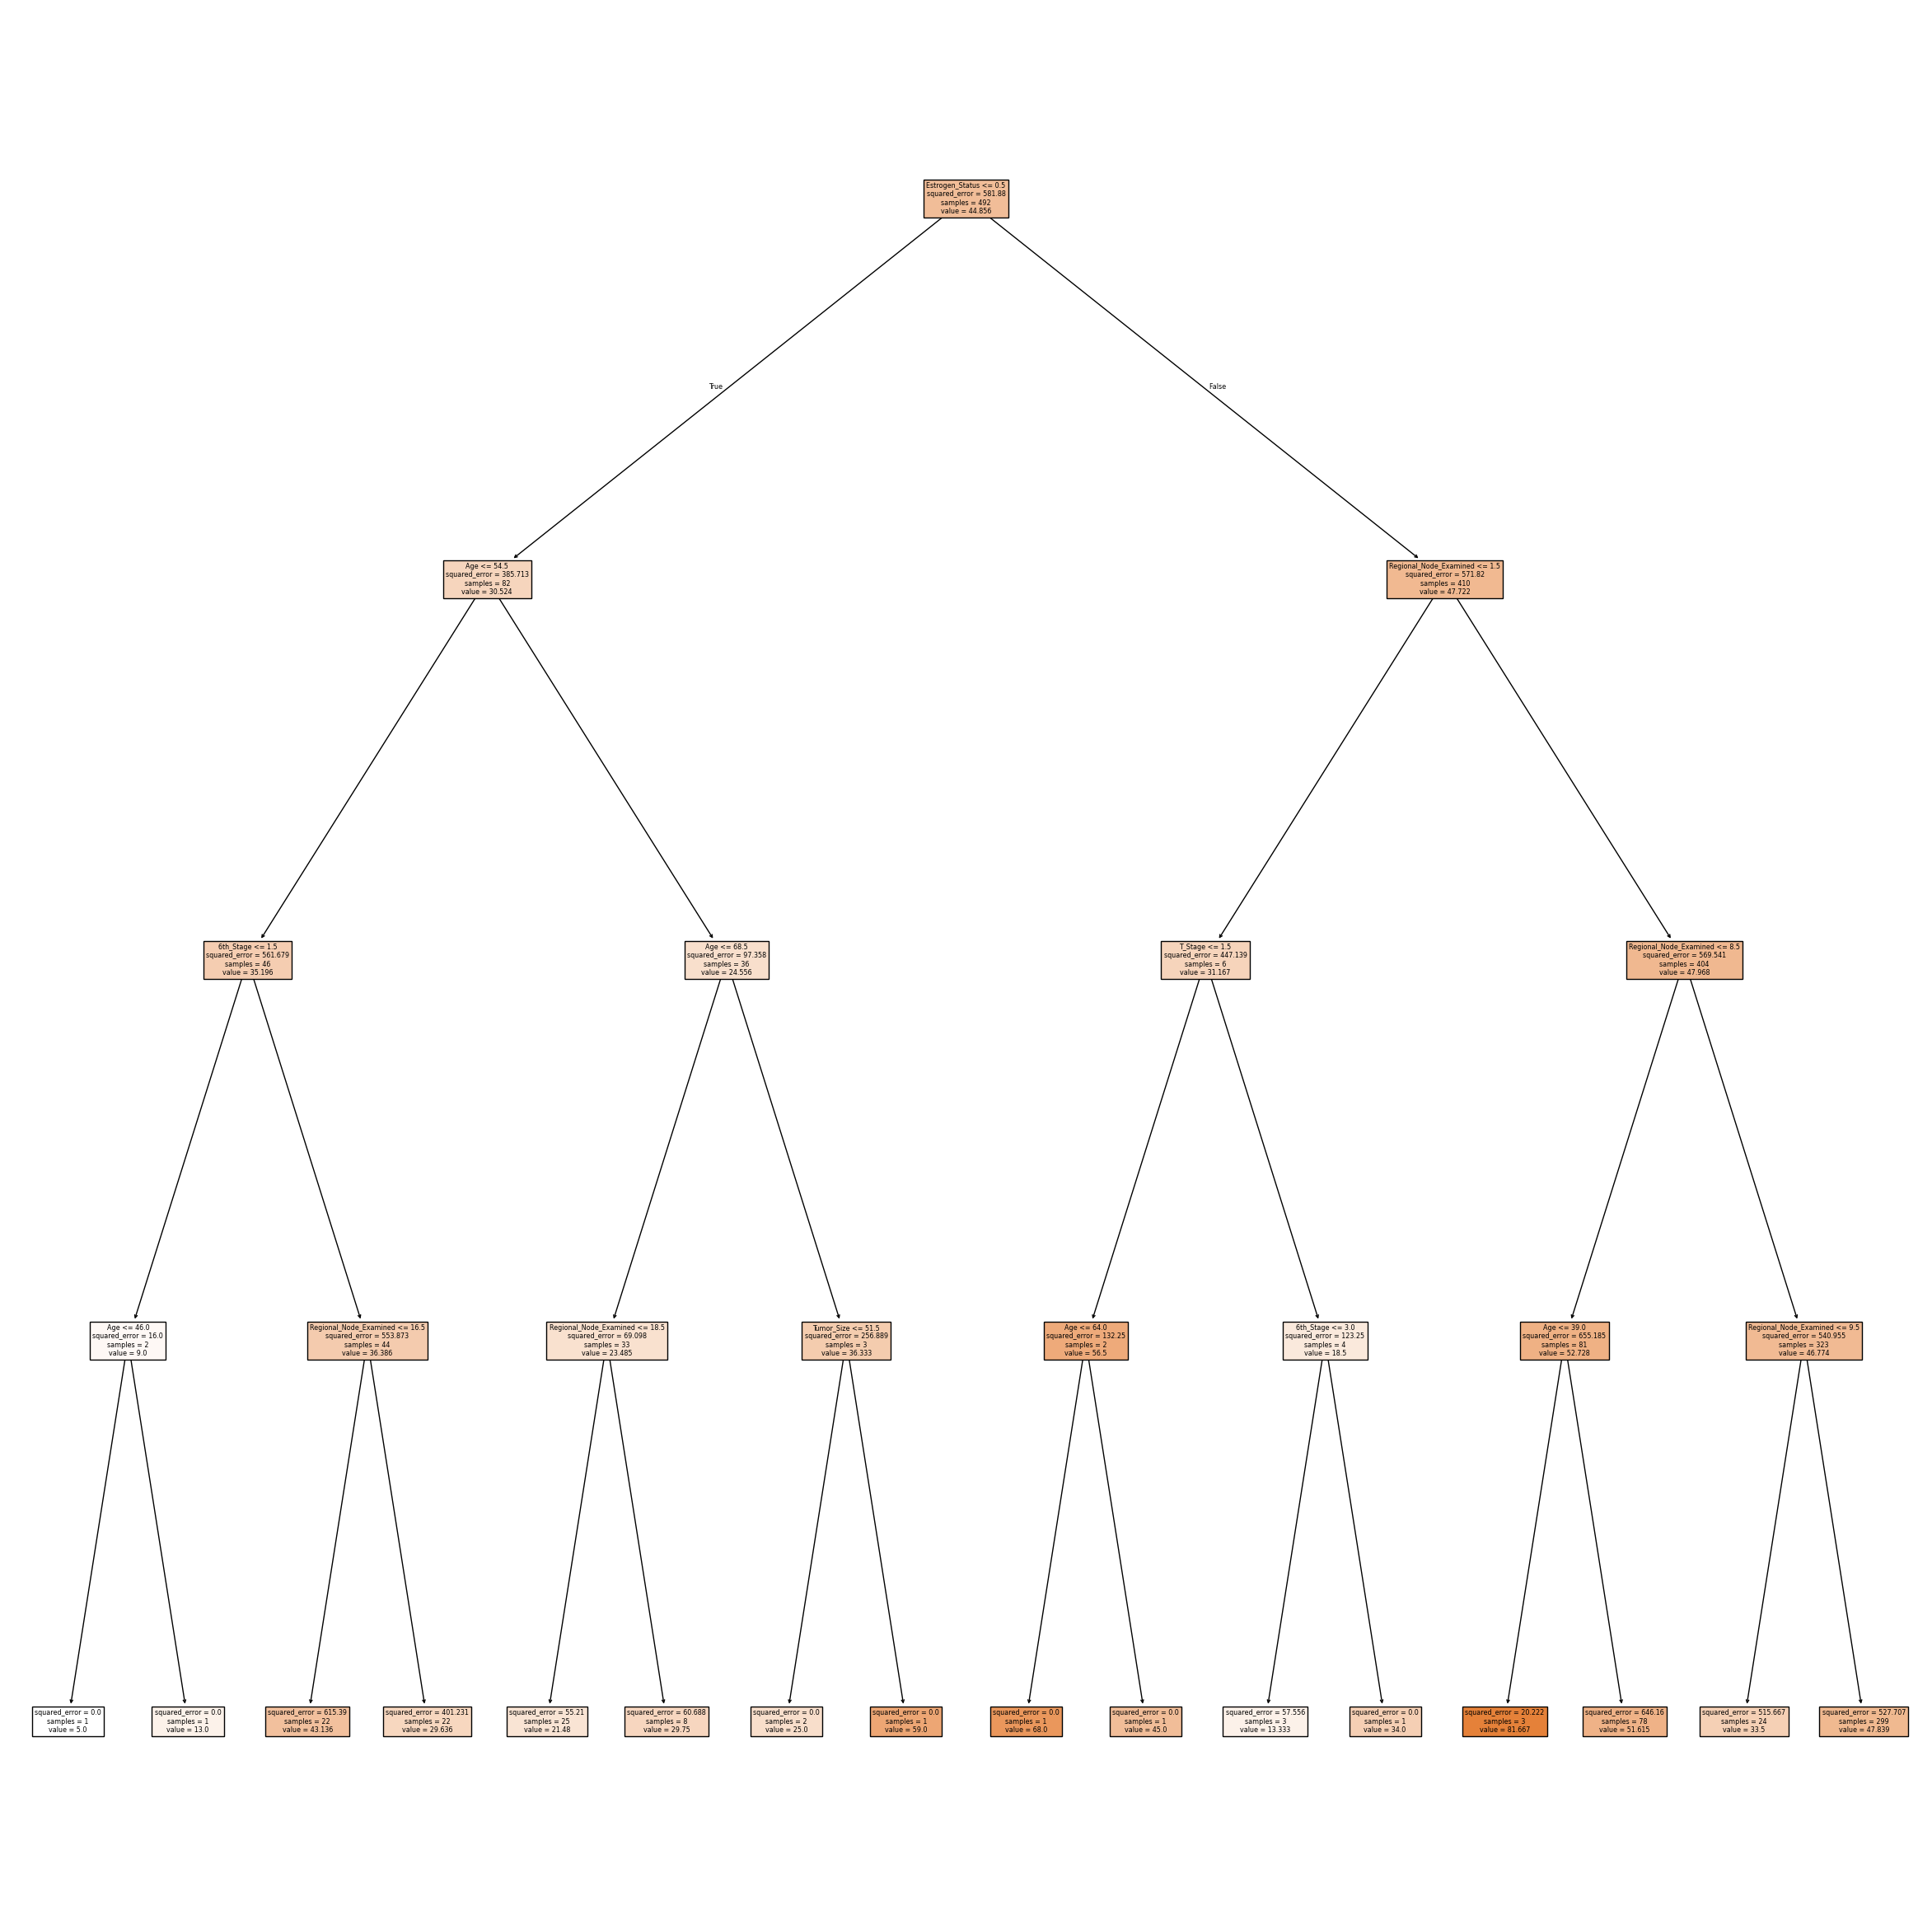

In [59]:
# This code was reused from Code Reuse Session 3: Part 2, Item 11
# plots decision tree model for survival months.
Tree_figure = plt.figure(figsize=(30,30))

DT_Graph = tree.plot_tree(DT_regressor_pruned, feature_names=list(X_train.columns), filled=True)

In [62]:
# This code was reused from Code Reuse Session 3: Part 2, Item 12
# Save DT graph as a high-resolution image
Tree_figure.savefig("/content/drive/MyDrive/IIT/LEVEL 5/ML/CW/decistion_tree.svg")

In [65]:
import numpy as np

# Encoded patient data
patient_B002565 = np.array([[29, 3, 1, 5, 0, 2, 1, 41, 0, 1, 5, 1]])

# Predict using pruned decision tree
predicted_survival = DT_regressor_pruned.predict(patient_B002565)
print(f"Predicted Survival Months: {predicted_survival[0]:.2f}")

Predicted Survival Months: 43.14


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
